# The Integrate and Fire Model: A simple neuronal model

The code in this notebook simulates an Integrate-and-Fire neuron. A description of the model can be found in this [blog post](#link).

I used  a basic Euler method for numerical integration, which might not be accurate for large time steps or fast dynamics. For a more accurate simulation, you might want to use a more sophisticated method like Runge-Kutta or use a library like [*Brian2*](https://briansimulator.org) that is specifically designed for simulating spiking neural networks.

## Neuron with one input
The following code simulates a neuron with constant input current:

$$ \tau {dU_R(t) \over dt} = - U_R(t) + RI$$

where $U_R$ is the membrane potential, $R$ is the membrane resistance, $I$ is the input current and $\tau$ is the membrane time constant. In the *Python* function definition, I use the notation 


The corresponding equation in LaTeX notation for the Python function using the Euler method is:

$$\frac{dV}{dt} = \frac{I - V / R}{C}$$

where $C$ is the capacitance and $V$ denotes the membrane potential and $I$ is the constant input current.  The Euler method is then used to numerically integrate this differential equation, with the updated potential at each time step given by:

$$V(t + dt) = V(t) + \frac{dV}{dt} \cdot dt$$

Finally, there is a condition that if the membrane potential $V$ exceeds the threshold $V_{\text{threshold}}$, the membrane potential is reset to the resting potential $V_{\text{rest}}$, and the time of the spike is recorded.


You can adjust each parameter using the sliders. The plot shows the membrane potential $U$/$V$ over time along with the recorded spike times.

In [1]:
# %% IMPORTS
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, FloatSlider
import ipywidgets as widgets

In [2]:
def integrate_and_fire_neuron(I, R, C, V_threshold, V_rest):
    dt = 0.01  # Time step
    t = np.arange(0, 100, dt)  # Time vector
    num_steps = len(t)

    V = np.zeros(num_steps)  # Membrane potential
    V[0] = V_rest  # Initial potential is the resting potential
    spike_times = []  # Spike times

    for i in range(1, num_steps):
        dV = (I - V[i-1]/R) / C  # Change in potential
        V[i] = V[i-1] + dV*dt  # Update potential

        if V[i] >= V_threshold:
            V[i] = V_rest  # Reset potential to resting potential after spike
            spike_times.append(i*dt)  # Record spike time

    return t, V, spike_times

def plot_integrate_and_fire(I, R, C, V_threshold, V_rest):
    t, V, spike_times = integrate_and_fire_neuron(I, R, C, V_threshold, V_rest)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(t, V)
    plt.xlabel('Time')
    plt.ylabel('Membrane Potential')
    plt.title('Membrane Potential vs. Time')
    
    
    plt.subplot(1, 2, 2)
    plt.plot(t, np.zeros_like(t))
    plt.scatter(spike_times, np.zeros_like(spike_times), c='r')
    plt.eventplot(spike_times, lineoffsets=0, linelengths=0.9, color='r')
    plt.xlabel('Time')
    plt.title('Spike Times')
    plt.yticks([])

    plt.tight_layout()
    plt.show()

# Create interactive sliders
interact(plot_integrate_and_fire,
         I=widgets.FloatSlider(min=0.0, max=10.0, step=0.1, value=0.8, description='I'),
         R=widgets.FloatSlider(min=1.0, max=10.0, step=0.1, value=6.4, description='R'),
         C=widgets.FloatSlider(min=0.1, max=1.0, step=0.05, value=0.9, description='C'),
         V_threshold=widgets.FloatSlider(min=1.0, max=10.0, step=0.5, value=5.0, description='theta'),
         V_rest=widgets.FloatSlider(min=0.0, max=1.0, step=0.05, value=0.4, description='u_rest'))

interactive(children=(FloatSlider(value=0.8, description='I', max=10.0), FloatSlider(value=6.4, description='R…

<function __main__.plot_integrate_and_fire(I, R, C, V_threshold, V_rest)>

## Time-dependent input current
This is modification of the code above, now simulating an Integrate-and-Fire Neuron with time-dependent input current:

$$ \tau {dU_R(t) \over dt} = - U_R(t) + RI(t)$$

where $U_R$ is the membrane potential, $R$ is the membrane resistance, $I$ is the input current and $\tau$ is the membrane time constant. In the Python function definition I use the notation 

$$\frac{dV}{dt} = \frac{I(t) - V/R}{C}$$

where $C$ is the capacitance and $V$ denotes the membrane potential. The Euler method is then used to numerically integrate this differential equation, with the updated potential at each time step given by:

$$V(t + dt) = V(t) + \frac{dV}{dt} \cdot dt $$

Finally, there is a condition that if the membrane potential $V$ exceeds the threshold $V_{\text{threshold}}$, the membrane potential is reset to zero, and the time of the spike is recorded.


You can adjust each parameter using the sliders. The plot shows the membrane potential $U$/$V$ over time along with the spike times.



In [7]:
def integrate_and_fire_neuron_time(I, u_rest, u_r, theta, R, tau_m, t_max):
    t = np.linspace(0, t_max, num=1000)  # Time array
    u = np.zeros_like(t)  # Membrane potential array
    spikes = []  # Spike times

    for i in range(1, len(t)):
        dt = t[i] - t[i-1]
        du = (u_rest - u[i-1] + R * I(t[i-1]) / tau_m) * dt / tau_m
        u[i] = u[i-1] + du

        if u[i] >= theta:
            u[i] = u_r
            spikes.append(t[i])
    return t, u, spikes

# Define time-dependent input current function
def I(t):
    return np.sin(t)

# Interactive plot
@interact(u_rest=FloatSlider(48.4, min=-100, max=100), 
          u_r=FloatSlider(-70, min=-100, max=100), 
          theta=FloatSlider(48.2, min=-100, max=100), 
          R=FloatSlider(100, min=0, max=100), 
          tau_m=FloatSlider(6.3, min=0, max=100), 
          t_max=FloatSlider(100., min=0, max=1000))
def plot(u_rest, u_r, theta, R, tau_m, t_max):
    t, u, spikes = integrate_and_fire_neuron_time(I, u_rest, u_r, theta, R, tau_m, t_max)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(t, u)
    plt.title('Time vs Membrane Potential')
    plt.xlabel('Time')
    plt.ylabel('Membrane Potential')
    
    plt.subplot(1, 2, 2)
    plt.plot(t, np.zeros_like(t))
    plt.scatter(spikes, np.zeros_like(spikes), c='r')
    plt.eventplot(spikes, lineoffsets=0, linelengths=0.9, color='r')
    plt.xlabel('Time')
    plt.title('Spike Times')
    plt.yticks([])

    plt.tight_layout()
    plt.show()


interactive(children=(FloatSlider(value=48.4, description='u_rest', min=-100.0), FloatSlider(value=-70.0, desc…

In [4]:
def integrate_and_fire_neuron_time(I_func, R, C, V_threshold):
    dt = 0.01  # Time step
    t = np.arange(0, 100, dt)  # Time vector
    num_steps = len(t)

    V = np.zeros(num_steps)  # Membrane potential
    spike_times = []  # Spike times

    for i in range(1, num_steps):
        I = I_func(t[i])  # Time-dependent input current
        dV = (I - V[i-1]/R) / C  # Change in potential
        V[i] = V[i-1] + dV*dt  # Update potential

        if V[i] >= V_threshold:
            V[i] = 0.0  # Reset potential after spike
            spike_times.append(i*dt)  # Record spike time

    return t, V, spike_times

def plot_integrate_and_fire_time(I_max, freq, R, C, V_threshold):
    # Function for time-dependent input current
    I_func = lambda t: I_max * np.sin(2 * np.pi * freq * t)

    t, V, spike_times = integrate_and_fire_neuron_time(I_func, R, C, V_threshold)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(t, V)
    plt.plot(t, np.ones_like(t) * V_threshold, 'r--', label='Threshold')
    plt.xlabel('Time')
    plt.ylabel('Membrane Potential')
    plt.title('Membrane Potential vs. Time')
    plt.legend(loc='upper right')

    plt.subplot(1, 2, 2)
    plt.plot(t, np.zeros_like(t))
    plt.scatter(spike_times, np.zeros_like(spike_times), c='r')
    plt.xlabel('Time')
    plt.title('Spike Times')

    plt.tight_layout()
    plt.show()

# Create interactive sliders
interact(plot_integrate_and_fire_time,
         I_max=widgets.FloatSlider(min=0.0, max=10.0, step=0.1, value=1.0, description='I_max'),
         freq=widgets.FloatSlider(min=0.01, max=1.0, step=0.01, value=0.1, description='Frequency'),
         R=widgets.FloatSlider(min=1.0, max=10.0, step=0.1, value=5.0, description='Resistance'),
         C=widgets.FloatSlider(min=0.1, max=1.0, step=0.05, value=0.5, description='Capacitance'),
         V_threshold=widgets.FloatSlider(min=1.0, max=10.0, step=0.5, value=5.0, description='Threshold'))


interactive(children=(FloatSlider(value=1.0, description='I_max', max=10.0), FloatSlider(value=0.1, descriptio…

<function __main__.plot_integrate_and_fire_time(I_max, freq, R, C, V_threshold)>

## Neuron with two inputs
This is a modification of the code above, now simulating an Integrate-and-Fire Neuron with two inputs currents.

In [5]:
def integrate_and_fire_neuron_two(I1, I2, R, C, V_threshold, V_rest):
    dt = 0.01  # Time step
    t = np.arange(0, 100, dt)  # Time vector
    num_steps = len(t)

    V = np.zeros(num_steps)  # Membrane potential
    V[0] = V_rest  # Initial potential is the resting potential
    spike_times = []  # Spike times

    for i in range(1, num_steps):
        I = I1 + I2  # Total input current is the sum of the two inputs
        dV = (I - V[i-1]/R) / C  # Change in potential
        V[i] = V[i-1] + dV*dt  # Update potential

        if V[i] >= V_threshold:
            V[i] = V_rest  # Reset potential to resting potential after spike
            spike_times.append(i*dt)  # Record spike time

    return t, V, spike_times

def plot_integrate_and_fire(I1, I2, R, C, V_threshold, V_rest):
    t, V, spike_times = integrate_and_fire_neuron_two(I1, I2, R, C, V_threshold, V_rest)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(t, V)
    plt.xlabel('Time')
    plt.ylabel('Membrane Potential')
    plt.title('Membrane Potential vs. Time')

    plt.subplot(1, 2, 2)
    plt.plot(t, np.zeros_like(t))
    plt.scatter(spike_times, np.zeros_like(spike_times), c='r')
    plt.eventplot(spike_times, lineoffsets=0, linelengths=0.9, color='r')
    plt.xlabel('Time')
    plt.title('Spike Times')
    plt.yticks([])

    plt.tight_layout()
    plt.show()

# Create interactive sliders
interact(plot_integrate_and_fire,
         I1=widgets.FloatSlider(min=0.0, max=10.0, step=0.1, value=1.0, description='I1'),
         I2=widgets.FloatSlider(min=0.0, max=10.0, step=0.1, value=1.3, description='I2'),
         R=widgets.FloatSlider(min=1.0, max=10.0, step=0.1, value=3.3, description='R'),
         C=widgets.FloatSlider(min=0.1, max=1.0, step=0.05, value=1.0, description='C'),
         V_threshold=widgets.FloatSlider(min=1.0, max=10.0, step=0.5, value=7.5, description='theta'),
         V_rest=widgets.FloatSlider(min=0.0, max=1.0, step=0.05, value=0.2, description='u_rest'))

interactive(children=(FloatSlider(value=1.0, description='I1', max=10.0), FloatSlider(value=1.3, description='…

<function __main__.plot_integrate_and_fire(I1, I2, R, C, V_threshold, V_rest)>

## Response of the membrane potential to different input current intensities and durations

Lastly, the code below simulates the response of the membrane potential to different input current intensities and durations. The membrane potential is plotted over time (roght) for each input current (left). The input current is a square pulse of a certain duration and amplitude. The membrane potential is reset to zero after each pulse. 

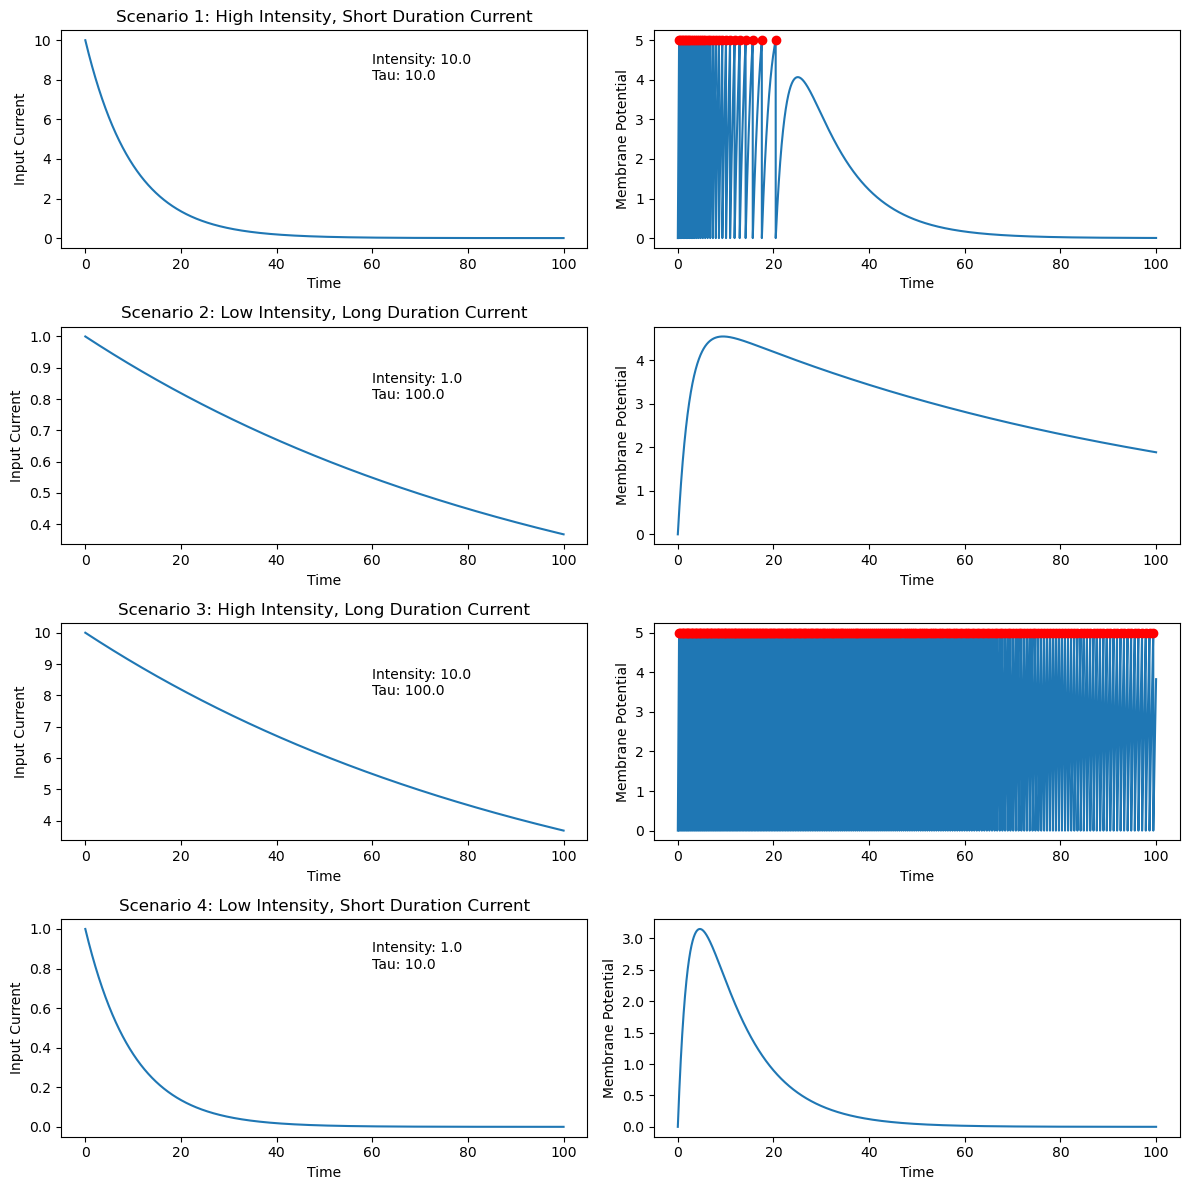

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def generate_input_current(t, I_peak, tau):
    # Generate a time-dependent current that peaks at I_peak and decays with time constant tau
    I = I_peak * np.exp(-t/tau)
    return I

def integrate_and_fire_neuron(I, R, C, V_threshold, V_rest, dt):
    num_steps = len(I)

    V = np.zeros(num_steps)  # Membrane potential
    V[0] = V_rest  # Initial potential is the resting potential
    spike_times = []  # Spike times

    for i in range(1, num_steps):
        dV = (I[i] - V[i-1]/R) / C  # Change in potential
        V[i] = V[i-1] + dV*dt  # Update potential

        if V[i] >= V_threshold:
            V[i] = V_rest  # Reset potential to resting potential after spike
            spike_times.append(i*dt)  # Record spike time

    return V, spike_times

# Parameters
R = 5.0
C = 0.5
V_threshold = 5.0
V_rest = 0.0
dt = 0.01
t = np.arange(0, 100, dt)

# Scenario 1: High intensity, short duration current
I_peak1 = 10.0
tau1 = 10.0
I1 = generate_input_current(t, I_peak1, tau1)

# Scenario 2: Low intensity, long duration current
I_peak2 = 1.0
tau2 = 100.0
I2 = generate_input_current(t, I_peak2, tau2)

# Scenario 3: High intensity, long duration current
I_peak3 = 10.0
tau3 = 100.0
I3 = generate_input_current(t, I_peak3, tau3)

# Scenario 4: Low intensity, short duration current
I_peak4 = 1.0
tau4 = 10.0
I4 = generate_input_current(t, I_peak4, tau4)

# Compute membrane potentials and spike times
V1, spike_times1 = integrate_and_fire_neuron(I1, R, C, V_threshold, V_rest, dt)
V2, spike_times2 = integrate_and_fire_neuron(I2, R, C, V_threshold, V_rest, dt)
V3, spike_times3 = integrate_and_fire_neuron(I3, R, C, V_threshold, V_rest, dt)
V4, spike_times4 = integrate_and_fire_neuron(I4, R, C, V_threshold, V_rest, dt)

# Create plots
plt.figure(figsize=(12, 12))

plt.subplot(4, 2, 1)
plt.plot(t, I1)
plt.xlabel('Time')
plt.ylabel('Input Current')
plt.title('Scenario 1: High Intensity, Short Duration Current')
plt.text(60, 8, 'Intensity: {}\nTau: {}'.format(I_peak1, tau1))

plt.subplot(4, 2, 2)
plt.plot(t, V1)
if spike_times1:
    plt.plot(spike_times1, V_threshold*np.ones_like(spike_times1), 'ro')
plt.xlabel('Time')
plt.ylabel('Membrane Potential')

plt.subplot(4, 2, 3)
plt.plot(t, I2)
plt.xlabel('Time')
plt.ylabel('Input Current')
plt.title('Scenario 2: Low Intensity, Long Duration Current')
plt.text(60, 0.8, 'Intensity: {}\nTau: {}'.format(I_peak2, tau2))

plt.subplot(4, 2, 4)
plt.plot(t, V2)
if spike_times2:
    plt.plot(spike_times2, V_threshold*np.ones_like(spike_times2), 'ro')
plt.xlabel('Time')
plt.ylabel('Membrane Potential')

plt.subplot(4, 2, 5)
plt.plot(t, I3)
plt.xlabel('Time')
plt.ylabel('Input Current')
plt.title('Scenario 3: High Intensity, Long Duration Current')
plt.text(60, 8, 'Intensity: {}\nTau: {}'.format(I_peak3, tau3))

plt.subplot(4, 2, 6)
plt.plot(t, V3)
if spike_times3:
    plt.plot(spike_times3, V_threshold*np.ones_like(spike_times3), 'ro')
plt.xlabel('Time')
plt.ylabel('Membrane Potential')

plt.subplot(4, 2, 7)
plt.plot(t, I4)
plt.xlabel('Time')
plt.ylabel('Input Current')
plt.title('Scenario 4: Low Intensity, Short Duration Current')
plt.text(60, 0.8, 'Intensity: {}\nTau: {}'.format(I_peak4, tau4))

plt.subplot(4, 2, 8)
plt.plot(t, V4)
if spike_times4:
    plt.plot(spike_times4, V_threshold*np.ones_like(spike_times4), 'ro')
plt.xlabel('Time')
plt.ylabel('Membrane Potential')

plt.tight_layout()
plt.show()
